## Make plots for all materials
### Author: Henry Nachman
#### Last Updated: 2024-06-13


First, we will import the necessary packages...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.integrate import quad
import sys, os
from itertools import dropwhile
from fit_types import *


# Get the absolute path of the current script
abspath = os.path.abspath("material_plots.ipynb")
print(os.path.split(abspath))
path_to_tcFiles = f"{os.path.split(abspath)[0]}{os.sep}.."

('c:\\Users\\henac\\OneDrive - The University of Texas at Austin\\01_RESEARCH\\05_CMBS4\\Cryogenic_Material_Properties\\thermal_conductivity', 'material_plots.ipynb')


In [2]:
all_files = os.listdir(path_to_tcFiles)
exist_files = [file for file in all_files if file.startswith("tc_fullrepo")]
print(exist_files)
tc_file_date = exist_files[0][-12:-4]

TCdata = np.loadtxt(f"{path_to_tcFiles}{os.sep}tc_fullrepo_{tc_file_date}.csv", dtype=str, delimiter=',') # imports compilation file csv
headers = TCdata[0] # pulls the headers from the file
mat_names = TCdata[:,0] # makes an array of material names

['tc_fullrepo_20240613.csv', 'tc_fullrepo_20240613.txt']


In [3]:
def get_parameters(mat):
    mat_row = TCdata[int(np.argwhere(mat_names == mat)[0][0])] # searches material name array for mat specified above and return relevant row
    param_headers = headers[5:]
    fit_type = mat_row[1]
    num_hi = sum(1 for c in param_headers if c.isupper()) # searches for the number of low parameters (by lower case letter)
    num_low = sum(1 for c in param_headers if c.islower()) # searches for number of high parameters
    fit_params = mat_row 
    fit_params = np.char.replace(fit_params, "^", "0")
    # fit_range, low_param, hi_param, erf_param = np.array(mat_row[2:4], dtype=float), np.array(fit_params[:num_low], dtype=float), np.array(fit_params[num_low:-1], dtype=float), float(fit_params[-1])

    fit_range = np.array(mat_row[2:4], dtype=float) # pulls the fit range
    # loop through headers and if lower case add to low_param vice versa
    low_param = []
    hi_param = []
    for key in headers[5:]:
        if key.islower() and key != "erf param":
            low_param.append(float(fit_params[int(np.argwhere(headers == key)[0][0])]))
        elif key.isupper():
            hi_param.append(float(fit_params[int(np.argwhere(headers == key)[0][0])]))
        elif key == "erf param":
            erf_param = float(fit_params[int(np.argwhere(headers == key)[0][0])])

    # now we have a list of lower and upper parameters but, they might have trailing 0s if they have fewer parameters than other materials
    # so now we remove those trailing 0s
    def remove_trailing_zeros(arr):
        return list(dropwhile(lambda x: x == 0, arr[::-1]))
    low_param = remove_trailing_zeros(low_param)
    hi_param = remove_trailing_zeros(hi_param)
    if fit_type not in ["Nppoly", "polylog", "comppoly"]:
        low_param = low_param[::-1]
        hi_param = hi_param[::-1]
    print(low_param, hi_param, erf_param)
    param_dictionary = {"fit_type":  fit_type,
                        "fit_range": fit_range,
                        "low_param": low_param,
                        "hi_param":  hi_param,
                        "erf_param": erf_param}
    return param_dictionary

[-18.5104, 29.2536, 2.07719, -2.22005] [] 0.0
Aluminum_1100 {'fit_type': 'Nppoly', 'fit_range': array([0.264, 1.061]), 'low_param': [-18.5104, 29.2536, 2.07719, -2.22005], 'hi_param': [], 'erf_param': 0.0}


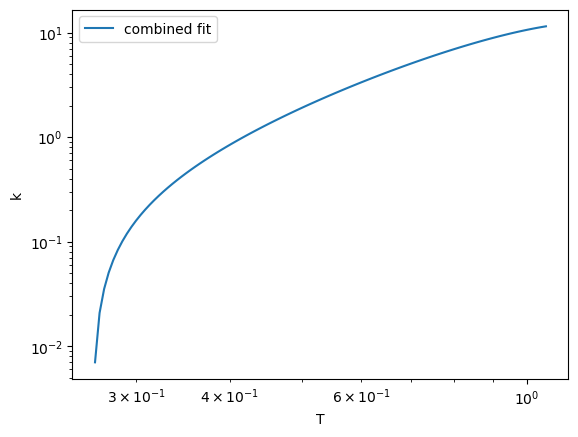

[-0.172667, 1.63939, -6.18721, 11.9165, -12.6905, 7.4624, -1.1437, 0.63736] [] 0.0
Aluminum_3003F {'fit_type': 'polylog', 'fit_range': array([  4., 300.]), 'low_param': [-0.172667, 1.63939, -6.18721, 11.9165, -12.6905, 7.4624, -1.1437, 0.63736], 'hi_param': [], 'erf_param': 0.0}
0


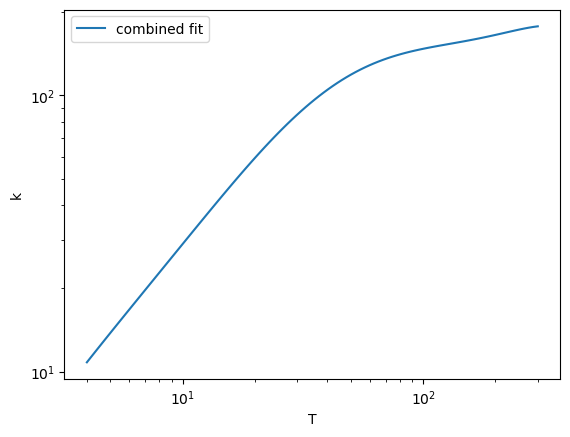

[0.067336, -0.77295, 3.6873, -9.3977, 13.612, -11.112, 5.751, -0.90933] [] 0.0
Aluminum_5083O {'fit_type': 'polylog', 'fit_range': array([  4., 300.]), 'low_param': [0.067336, -0.77295, 3.6873, -9.3977, 13.612, -11.112, 5.751, -0.90933], 'hi_param': [], 'erf_param': 0.0}
0


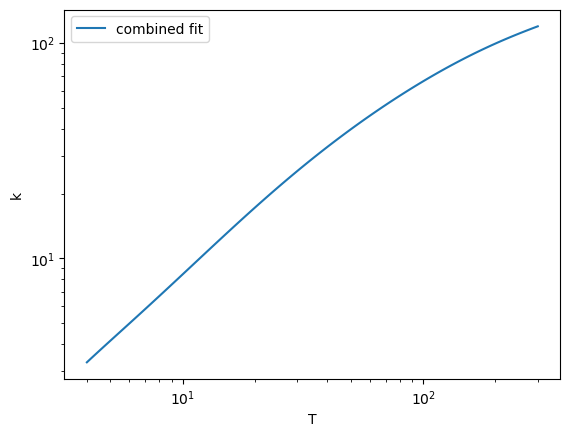

[-0.00571, 0.04179, -0.09464, 0.02803, 0.08084, -0.07277, 1.0957, 0.07918] [] 0.0
Aluminum_6061T6 {'fit_type': 'polylog', 'fit_range': array([  4., 300.]), 'low_param': [-0.00571, 0.04179, -0.09464, 0.02803, 0.08084, -0.07277, 1.0957, 0.07918], 'hi_param': [], 'erf_param': 0.0}
0


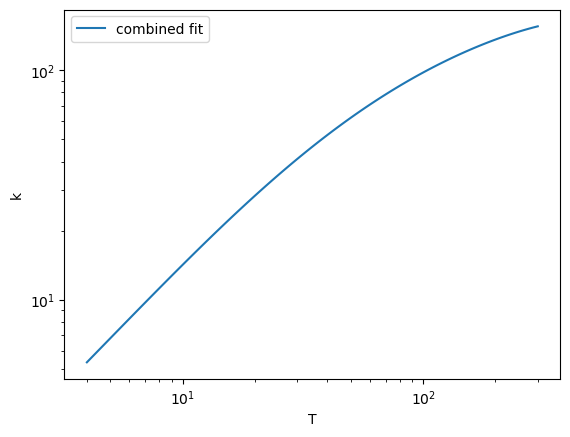

[1.45769, -18.8102, 102.387, -305.997, 547.832, -601.154, 394.955, -141.134, 22.4014] [] 0.0
Aluminum_6063T5 {'fit_type': 'polylog', 'fit_range': array([  4., 296.]), 'low_param': [1.45769, -18.8102, 102.387, -305.997, 547.832, -601.154, 394.955, -141.134, 22.4014], 'hi_param': [], 'erf_param': 0.0}
0


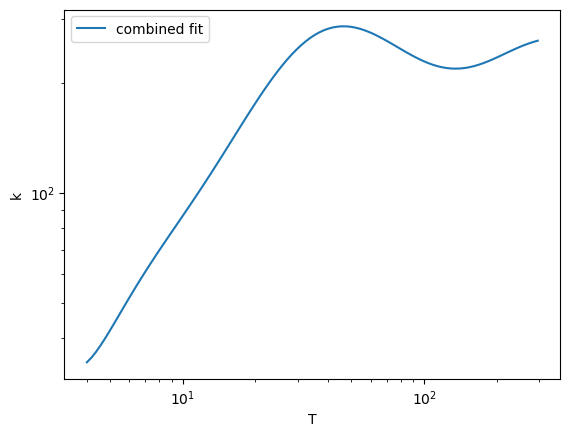

[-0.10501, 0.68722, -1.6145, 1.2788, 0.71218, -1.6954, 1.9319, -0.50015] [] 0.0
Beryllium_Copper {'fit_type': 'polylog', 'fit_range': array([ 2., 80.]), 'low_param': [-0.10501, 0.68722, -1.6145, 1.2788, 0.71218, -1.6954, 1.9319, -0.50015], 'hi_param': [], 'erf_param': 0.0}
0


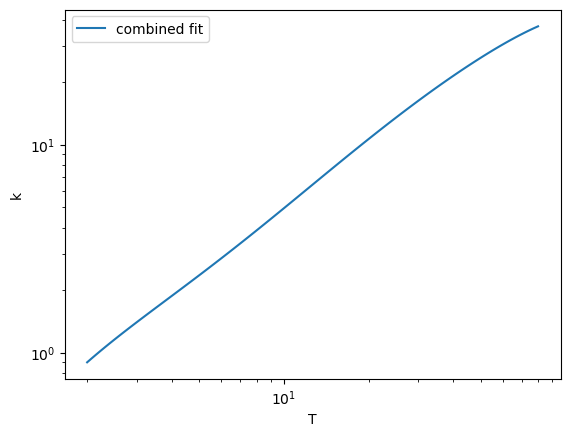

[-0.0038151, 0.174057, -1.12933, 3.20536, -5.03374, 4.54083, -1.01835, 0.021035] [] 0.0
Brass {'fit_type': 'polylog', 'fit_range': array([  5., 116.]), 'low_param': [-0.0038151, 0.174057, -1.12933, 3.20536, -5.03374, 4.54083, -1.01835, 0.021035], 'hi_param': [], 'erf_param': 0.0}
0


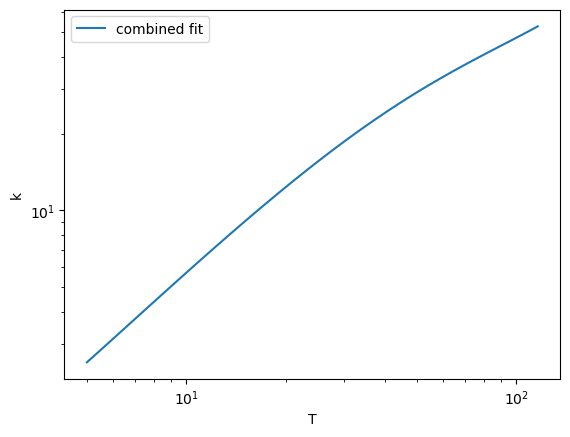

[0.000249809, -0.00217074, 0.00520942, 0.00399669] [] 0.0
CFRP {'fit_type': 'Nppoly', 'fit_range': array([0.134, 4.842]), 'low_param': [0.000249809, -0.00217074, 0.00520942, 0.00399669], 'hi_param': [], 'erf_param': 0.0}


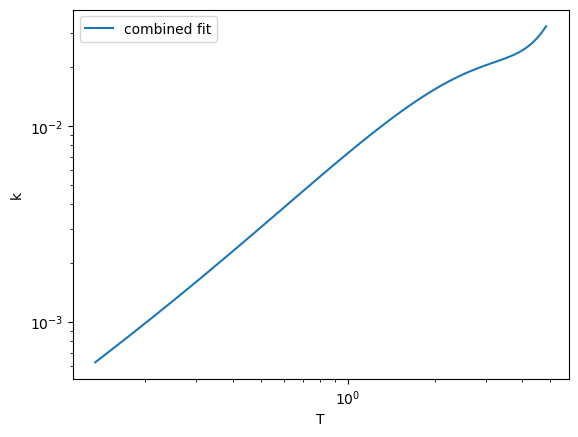

[0.000264819, -0.0025481, 0.00689859, 0.00333889] [] 0.0
CFRP_Clearwater {'fit_type': 'Nppoly', 'fit_range': array([0.134, 4.842]), 'low_param': [0.000264819, -0.0025481, 0.00689859, 0.00333889], 'hi_param': [], 'erf_param': 0.0}


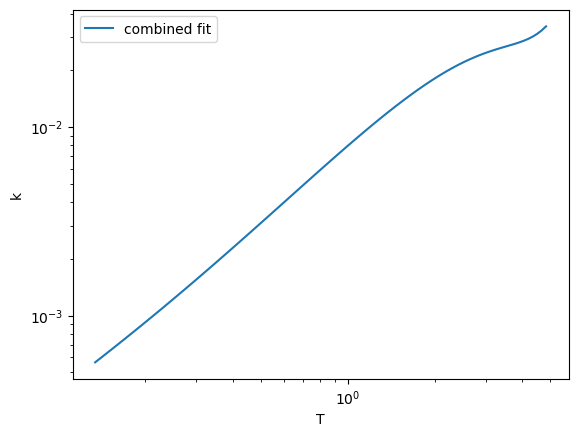

[9.2641e-05, -0.00126809, 0.00436685, 0.00105799] [] 0.0
CFRP_DPP {'fit_type': 'Nppoly', 'fit_range': array([0.698, 4.02 ]), 'low_param': [9.2641e-05, -0.00126809, 0.00436685, 0.00105799], 'hi_param': [], 'erf_param': 0.0}


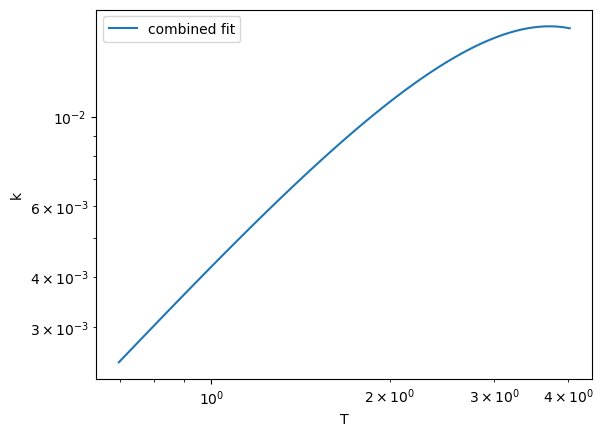

[0.000571214, -0.00447993, 0.00972794, 0.00298036] [] 0.0
CFRP_Graphlite {'fit_type': 'Nppoly', 'fit_range': array([0.309, 4.015]), 'low_param': [0.000571214, -0.00447993, 0.00972794, 0.00298036], 'hi_param': [], 'erf_param': 0.0}


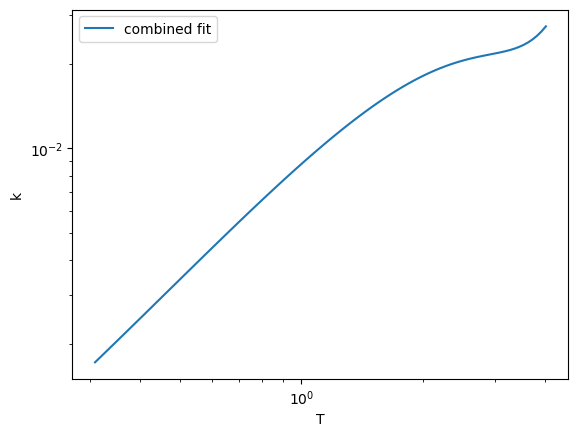

[6.0, -2.31, 5.71, -0.421155, 4.51269, -0.681198, -0.450256, 0.10042, 0.0645863] [] 0.0
Constantan {'fit_type': 'TchebyLnT', 'fit_range': array([1.e-01, 3.e+02]), 'low_param': [6.0, -2.31, 5.71, -0.421155, 4.51269, -0.681198, -0.450256, 0.10042, 0.0645863], 'hi_param': [], 'erf_param': 0.0}


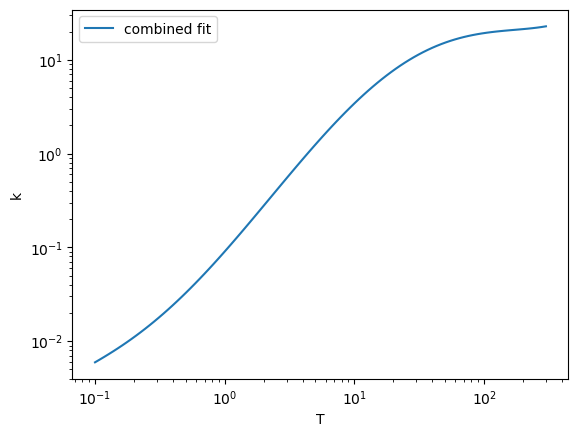

[2.2154, -0.47461, -0.88068, 0.13871, 0.29505, -0.02043, -0.04831, 0.001281, 0.003207] [] 0.0
Cu_OFHC_RRR100 {'fit_type': 'NIST-copperfit', 'fit_range': array([  4., 300.]), 'low_param': [2.2154, -0.47461, -0.88068, 0.13871, 0.29505, -0.02043, -0.04831, 0.001281, 0.003207], 'hi_param': [], 'erf_param': 0.0}


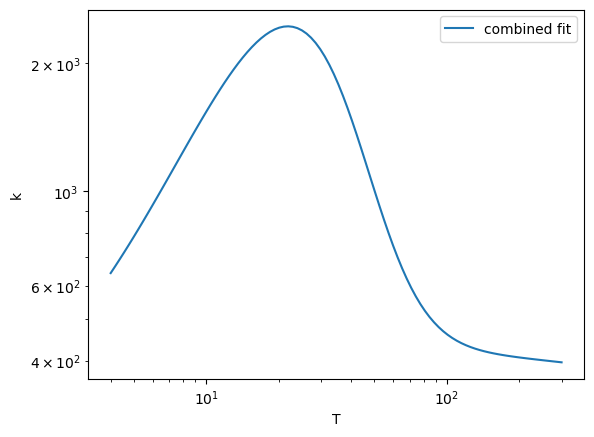

[2.3797, -0.4918, -0.98615, 0.13942, 0.30475, -0.019713, -0.046897, 0.0011969, 0.0029988] [] 0.0
Cu_OFHC_RRR150 {'fit_type': 'NIST-copperfit', 'fit_range': array([  4., 300.]), 'low_param': [2.3797, -0.4918, -0.98615, 0.13942, 0.30475, -0.019713, -0.046897, 0.0011969, 0.0029988], 'hi_param': [], 'erf_param': 0.0}


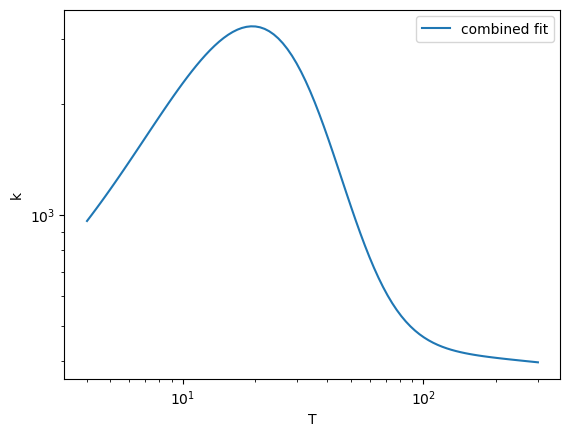

[1.357, 0.3981, 2.669, -0.1346, -0.6683, 0.01342, 0.05773, 0.0002147] [] 0.0
Cu_OFHC_RRR300 {'fit_type': 'NIST-copperfit', 'fit_range': array([  4., 300.]), 'low_param': [1.357, 0.3981, 2.669, -0.1346, -0.6683, 0.01342, 0.05773, 0.0002147], 'hi_param': [], 'erf_param': 0.0}


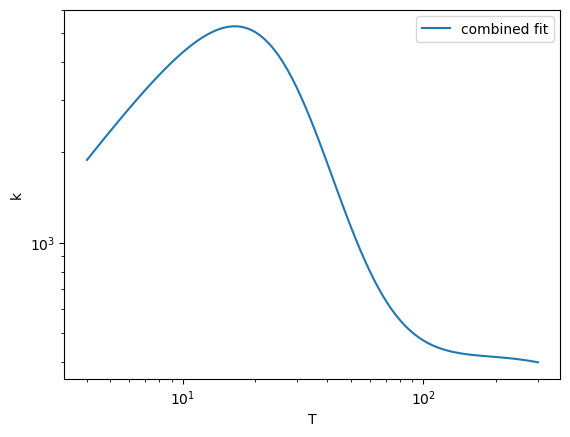

[1.8743, -0.41538, -0.6018, 0.13294, 0.26426, -0.0219, -0.051276, 0.0014871, 0.003723] [] 0.0
Cu_OFHC_RRR50 {'fit_type': 'NIST-copperfit', 'fit_range': array([  4., 300.]), 'low_param': [1.8743, -0.41538, -0.6018, 0.13294, 0.26426, -0.0219, -0.051276, 0.0014871, 0.003723], 'hi_param': [], 'erf_param': 0.0}


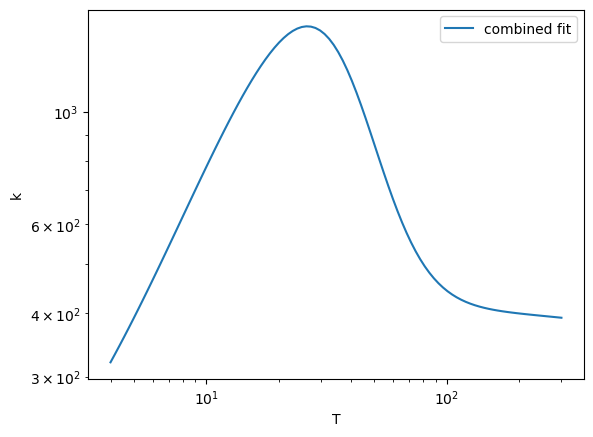

[2.8075, -0.54074, -1.2777, 0.15362, 0.36444, -0.02105, -0.051727, 0.0012226, 0.0030964] [] 0.0
Cu_OFHC_RRR500 {'fit_type': 'NIST-copperfit', 'fit_range': array([  4., 300.]), 'low_param': [2.8075, -0.54074, -1.2777, 0.15362, 0.36444, -0.02105, -0.051727, 0.0012226, 0.0030964], 'hi_param': [], 'erf_param': 0.0}


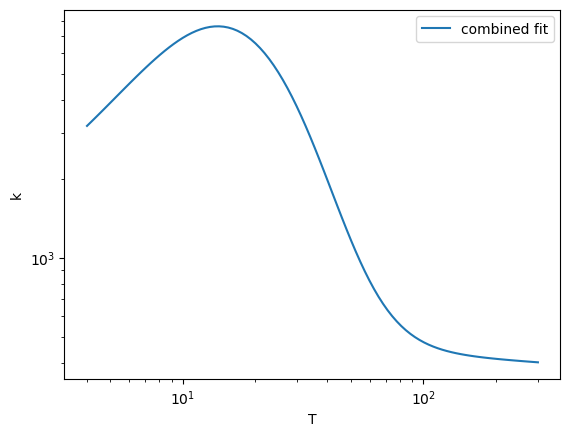

[0.0397, -0.6905, 4.4954, -14.663, 26.272, -26.068, 13.788, -4.1236] [] 0.0
G10_CR_Normal {'fit_type': 'polylog', 'fit_range': array([  4., 300.]), 'low_param': [0.0397, -0.6905, 4.4954, -14.663, 26.272, -26.068, 13.788, -4.1236], 'hi_param': [], 'erf_param': 0.0}
0


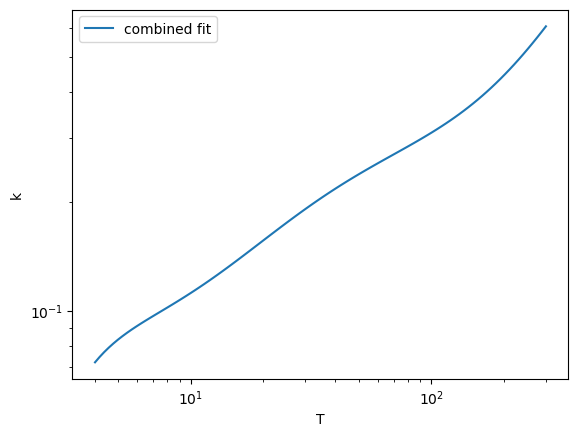

[-0.11701, 1.48806, -7.95635, 23.1778, -39.8754, 41.1625, -24.8998, 8.80228, -2.64827] [] 0.0
G10_CR_Warp {'fit_type': 'polylog', 'fit_range': array([  4., 300.]), 'low_param': [-0.11701, 1.48806, -7.95635, 23.1778, -39.8754, 41.1625, -24.8998, 8.80228, -2.64827], 'hi_param': [], 'erf_param': 0.0}
0


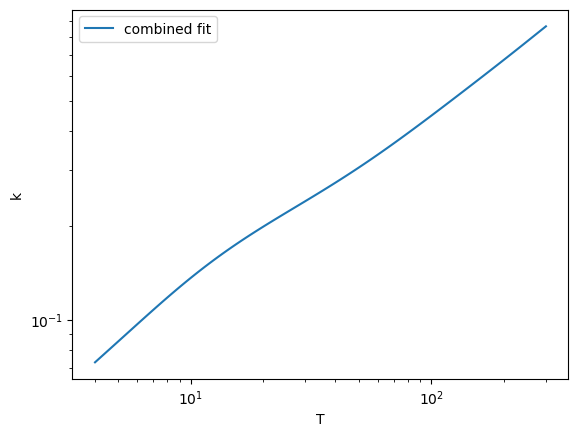

[0.00109025, -0.00763211, 0.0194298, -0.00255459] [] 0.0
G10_FR4 {'fit_type': 'Nppoly', 'fit_range': array([0.304, 2.971]), 'low_param': [0.00109025, -0.00763211, 0.0194298, -0.00255459], 'hi_param': [], 'erf_param': 0.0}


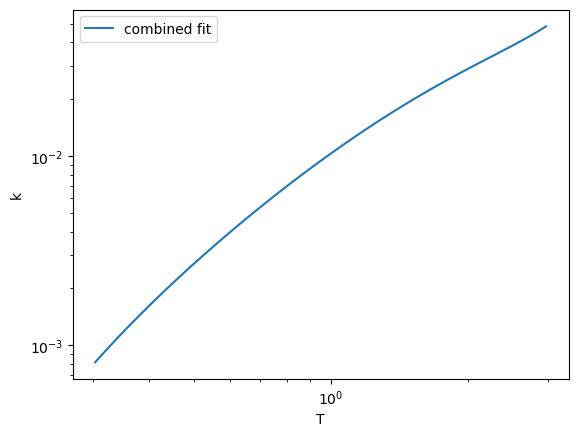

[-6.19597, 87.4249, -524.309, 1731.72, -3400.37, 3967.07, -2543.63, 689.532] [] 0.0
Glass_FabricPolyester_He_warp {'fit_type': 'polylog', 'fit_range': array([ 38., 300.]), 'low_param': [-6.19597, 87.4249, -524.309, 1731.72, -3400.37, 3967.07, -2543.63, 689.532], 'hi_param': [], 'erf_param': 0.0}
0


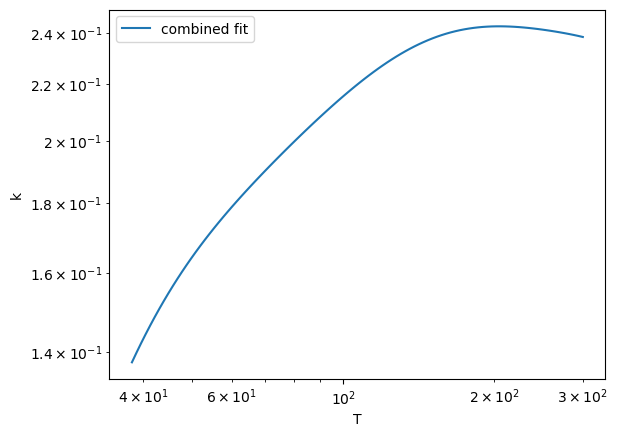

[37.9003, -475.7, 2475.33, -6832.07, 10542.7, -8616.64, 2909.91] [] 0.0
Glass_FabricPolyester_Ni_normal {'fit_type': 'polylog', 'fit_range': array([ 84., 300.]), 'low_param': [37.9003, -475.7, 2475.33, -6832.07, 10542.7, -8616.64, 2909.91], 'hi_param': [], 'erf_param': 0.0}
0


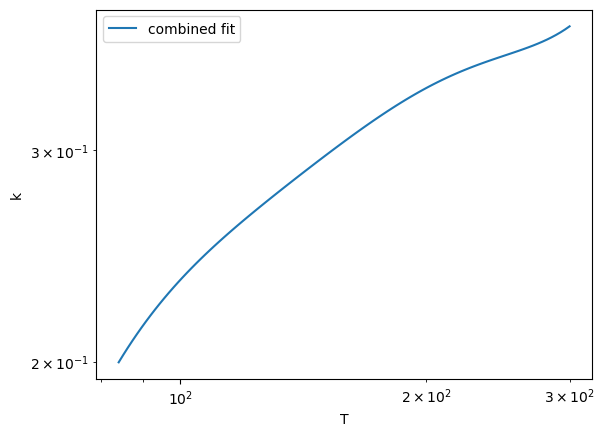

[-12.3133, 141.143, -613.856, 1101.98, 51.7242, -3249.41, 4639.74, -2141.58] [] 0.0
Glass_FabricPolyester_Ni_warp {'fit_type': 'polylog', 'fit_range': array([ 80., 300.]), 'low_param': [-12.3133, 141.143, -613.856, 1101.98, 51.7242, -3249.41, 4639.74, -2141.58], 'hi_param': [], 'erf_param': 0.0}
0


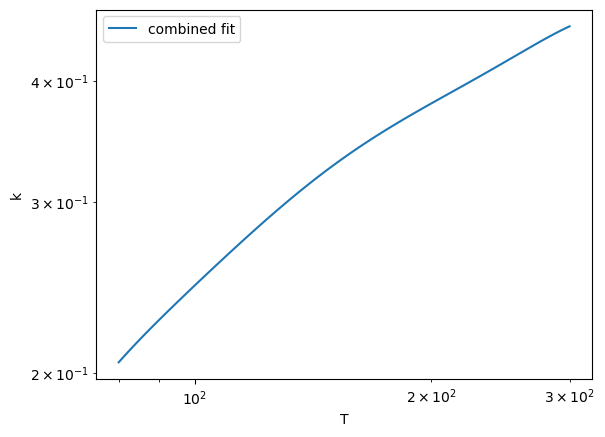

[300.0, 0.01, 1.76, 0.0051] [] 0.0
Graphite {'fit_type': 'lowTextrapolate', 'fit_range': array([0.15, 1.  ]), 'low_param': [300.0, 0.01, 1.76, 0.0051], 'hi_param': [], 'erf_param': 0.0}


ValueError: x and y must have same first dimension, but have shapes (100,) and (10000,)

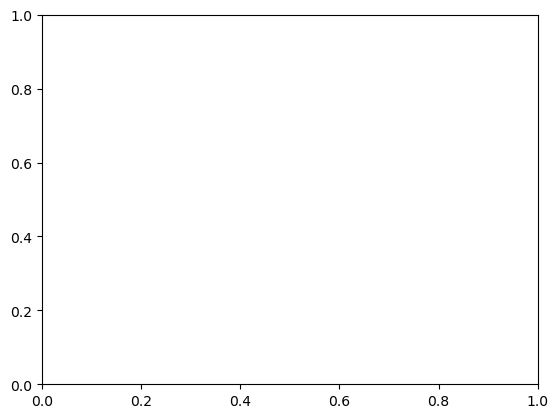

In [4]:
for mat in mat_names[1:]: # ["Graphite"]: # 
    param_dictionary = get_parameters(mat)
    print(mat, param_dictionary)
    T = np.logspace(np.log10(param_dictionary["fit_range"][0]),np.log10(param_dictionary["fit_range"][1]),100)
    func = get_func_type(param_dictionary["fit_type"])
    y_pred = func(T, param_dictionary)


    plt.plot(T, y_pred, label='combined fit')
    plt.semilogx()
    plt.semilogy()
    plt.ylabel("k")
    plt.xlabel("T")
    plt.legend()
    plt.show()

In [ ]:
def get_thermal_conductivity(T_range, k_func):
    x = np.linspace(T_range[0], T_range[1], 1000)
    print(low_param)
    y = k_func(x, low_param)
    ConInt = np.trapz(y, x)
    return ConInt

In [ ]:
k = get_thermal_conductivity([0.450, 0.459], func) #W/m
P = 0.0016174*k*10

NameError: name 'low_param' is not defined

In [ ]:
print(P)

3.9295268837837903e-07


In [ ]:
def integrand(t, param):

    return t*np.polyval(param, t)
ConIntQuad = quad(integrand, 0.007, 0.067, low_param)

In [ ]:
print(ConIntQuad[0]*0.0016174*10)

1.5176802000507042e-07
